# LEAP Plotting in Jupyter

Easy access to visualization makes for a smooth algorithm development cycle.  LEAP offers components to assist with plotting algorithms and problems with `matplotlib` and Jupyter.

## Live BSF Curves

In the [simple_ea.py](simple_ea.py) example, we used the `simple_ea(...)` function to apply some classic EAs to the Spheroid function.

We gave our application a handy CLI wrapper:

In [1]:
%run simple_ea.py mu-comma-lambda --help

Usage: simple_ea.py mu-comma-lambda [OPTIONS]

  Apply a (μ, λ)-style generational EA with tournament selection and
  Gaussian mutation to the `Spheroid` function.

Options:
  --evals INTEGER      Fitness evaluations to run for
  --pop_size INTEGER   Population size
  --l INTEGER          Length of the genome
  --mutate-prob FLOAT  Per-gene Gaussian mutation rate
  --mutate-std FLOAT   Standard deviation of Gaussian mutation
  --help               Show this message and exit.


And it prints out pretty numbers to `stdout`:

In [2]:
%run simple_ea.py mu-comma-lambda

generation, best_of_gen_fitness
5, 50.708743240227996
10, 75.58361337212678
15, 75.71099599790405
20, 75.71099599790405
25, 75.48331600032483
30, 75.16554629459296
35, 75.16554629459296
40, 75.1198011704542
45, 74.07236886296516
50, 74.07236886296516
55, 73.27625613574452
60, 73.2636562755479
65, 73.34579985467575
70, 73.31765866920941
75, 73.18903530014519
80, 73.31765866920941
85, 73.32822150348062
90, 72.87185900552309
95, 72.82724165417928
100, 72.80347936314854


But we can do better.  By simply inserting a `probe.PlotProbe` object into our EA operator pipeline, we can watch a fitness curve as it evolves in **real time**.

The key to live animation is to use the `%matplotlib notebook` magic:

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

Next we'll create the probe operator.  The probe will automatically scale the axes to ensure that the entire curve stays within view, but you optionally can set `xlim` and `ylim` bounds to add more space:

<IPython.core.display.Javascript object>


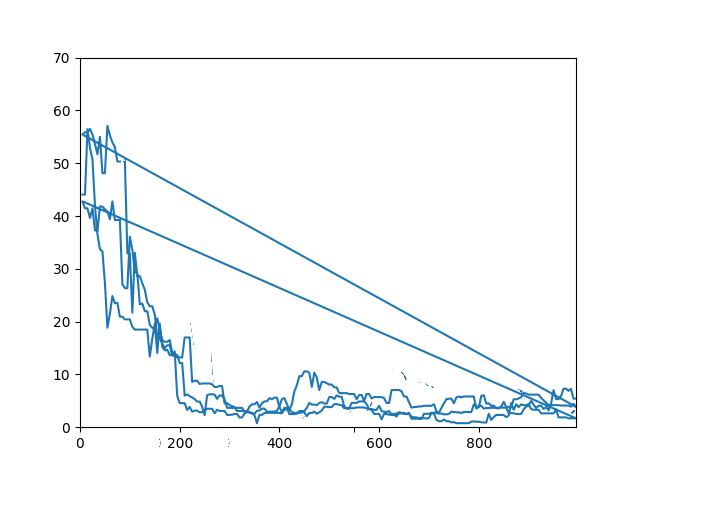

In [4]:
from leap.probe import PlotProbe

plt.figure()  # Setup a figure to plot to
plot_probe = PlotProbe(ylim=(0, 70))  # Attaches to the current axes by default

Not much is happening yet.  We've created the probe and attached it to a figure—but it still needs an algorithm!

Here we build a classic (μ, λ)-style EA to solve the `Spheroid` function—but we insert hooks from our `PlotProbe` in **two places**:

 1. The **step notification** list: this tells the algorithm that it needs to call `plot_probe.set_step` at each generation boundary to update the plot's x-coordinate
 
 ```Python
 step_notify_list=[plot_probe.set_step], 
 ```
 
 2. The **operator pipeline**: this ensures that the population passes through the probe at each iteration, so data can be collected for the y-coordinate
 
 ```Python
 pipeline=[
           plot_probe,
           ...
       ]
 ```

In [8]:
from leap.example.simple_ea import simple_ea
from leap import core, real, operate as op

evals=1000
pop_size=5
l=10
mutate_prob=1/l
mutate_std=1.0

ea = simple_ea(evals=evals, pop_size=pop_size,
               individual_cls=core.Individual,  # Use the standard Individual as the prototype for the population.
               decoder=core.IdentityDecoder(),  # Genotype and phenotype are the same for this task.
               problem=real.Spheroid(maximize=False),  # Solve a Spheroid minimization problem.
               evaluate=op.evaluate,  # Evaluate fitness with the basic evaluation operator.

               # Initialized genomes are random real-valued vectors.
               initialize=real.initialize_vectors_uniform(
                   # Initialize each element between 0 and 1.
                   bounds=[[-5.12, 5.12]] * l
               ),
            
               # STEP NOTIFICATION: sets plot_probe's x-coordinate
               step_notify_list=[plot_probe.set_step],
               
               # The operator pipeline.
               pipeline=[
                   # PIPELINE: sets plot_probe's y-coordinate
                   plot_probe,
                   # Select mu parents via tournament selection.
                   op.tournament(n=pop_size),
                   # Clone them to create offspring.
                   op.cloning,
                   # Apply Gaussian mutation to each gene with a certain probability.
                   op.mutate_gaussian(prob=mutate_prob, std=mutate_std)
               ])
list(ea);

Scroll up to the previous cell while the algorithm is running—the live results get placed there, thanks to the callbacks on `plot_probe`!

## Viewing Fitness Functions

TBD.

In [6]:
assert(false)

NameError: name 'false' is not defined